# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm.</span>




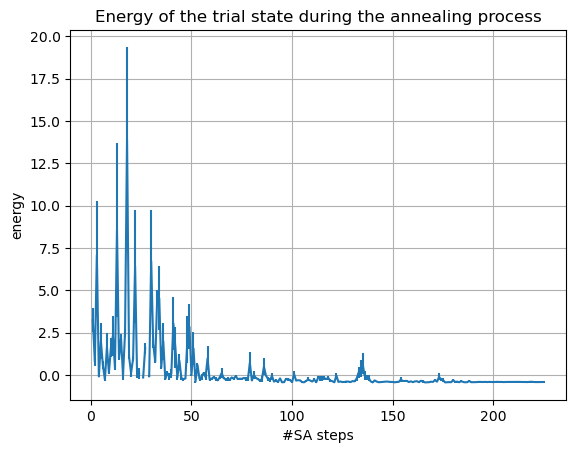

In [3]:
data_energy = np.loadtxt('energy.out')
csteps_energy = data_energy[:, 0]
energy_av = data_energy[:, 1]
energy_err = data_energy[:, 2]

plt.errorbar(csteps_energy, energy_av, yerr=energy_err)
plt.xlabel('#SA steps')
plt.ylabel('energy')
plt.title('Energy of the trial state during the annealing process')
plt.grid(True)
plt.show()

- show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps.

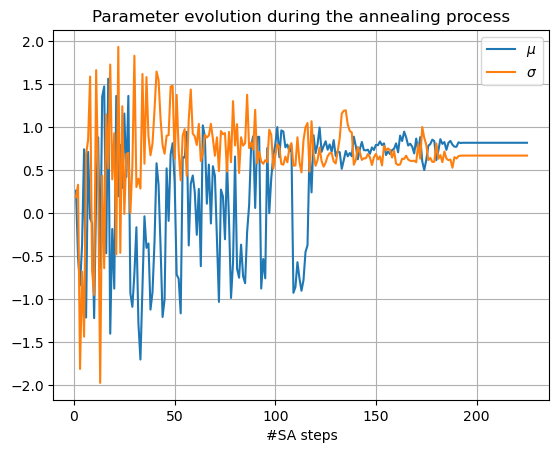

In [4]:
data_params = np.loadtxt('params.out')
csteps_params = data_params[:, 0]
mu_csteps = data_params[:, 1]
sigma_csteps = data_params[:, 2]

plt.plot(csteps_params, mu_csteps, label='$\mu$')
plt.plot(csteps_params, sigma_csteps, label='$\sigma$')
plt.xlabel('#SA steps')
plt.title('Parameter evolution during the annealing process')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
mu_best = mu_csteps[-1]
sigma_best = sigma_csteps[-1]

print('mu = ', mu_best)
print('sigma = ', sigma_best)

mu =  0.820311
sigma =  0.671222


- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>

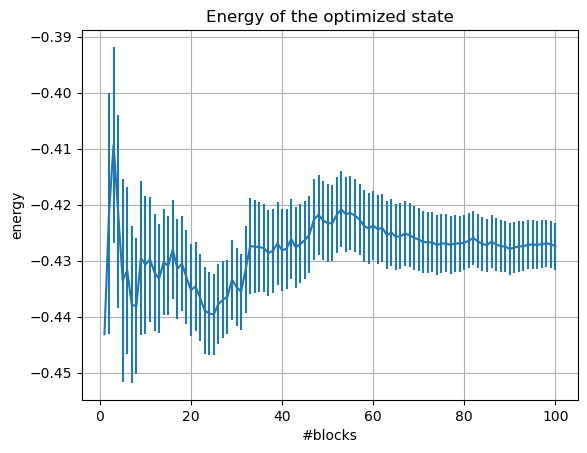

In [6]:
data_energy_fin = np.loadtxt('energy_fin.out')
blocks_energy_fin = data_energy_fin[:, 0]
energy_fin_av = data_energy_fin[:, 1]
energy_fin_err = data_energy_fin[:, 2]

plt.errorbar(blocks_energy_fin, energy_fin_av, yerr=energy_fin_err)
plt.xlabel('#blocks')
plt.ylabel('energy')
plt.title('Energy of the optimized state')
plt.grid(True)
plt.show()

- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

In [7]:
data_psi2 = np.loadtxt('psi2.out')
x_sim = data_psi2[:, 0]
y_sim = data_psi2[:, 1]

Ground state energy:  -0.46046587969271546


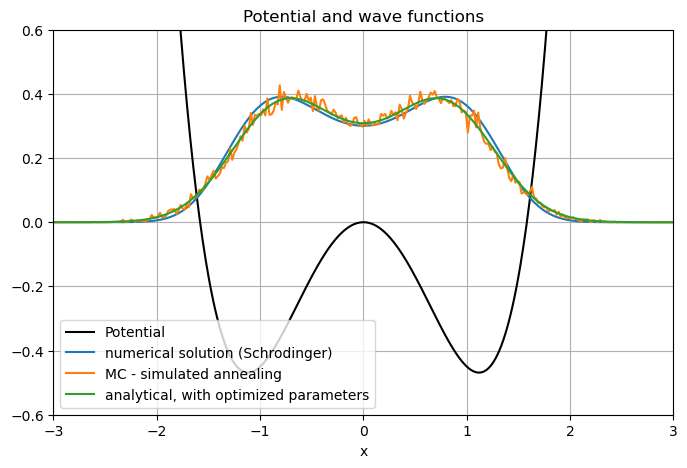

In [8]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
def Psi2(x):
    return (np.exp(-(x-mu_best)**2/(2.0 * sigma_best**2)) + np.exp(-(x+mu_best)**2/(2.0 * sigma_best**2)))**2


hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
#print("1st excited state energy: ", E[1])
#print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label='numerical solution (Schrodinger)')
plt.plot(x_sim, y_sim, label='MC - simulated annealing')
plt.plot(x, Psi2(x)/(a*np.mean(Psi2(x))), label='analytical, with optimized parameters')
#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)
plt.title("Potential and wave functions")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

### Comments

- One might think that a good way to get an estimation of the uncertainty on the parameters is to run the simulation at the last temperature in the annealing schedule for a long time and to take the mean of the standard deviation of the parameters among a decent amount of blocks. However, this turns out to be unfeasible. Infact, data blocking relies on the hypothesis that the blocks are statistically independent. As the temperature decreases, the acceptance rate of the Metropolis algorithm becomes smaller and smaller. This problem can be tackled updating the length of the step if the acceptance rate falls under a certain treshold (which infact I did), but eventually one faces representation errors. As a result, the Boltzmann distribution can't be sampled from accurately and this undermines the statistical independence of the blocks. What happens in practice is that the standard deviation of the mean is several orders of magnitude smaller than the difference between the parameters yielded be the same algorithm with a slight chance in the initial parameters. </p>


- The initial parameters given in the simulation (see "main.cpp") are in some sense a good guess, since they are the same order of magnituded of the optimized ones. The SA algorithm converges to the correct values of $\mu$ and $\sigma$ even for a different choice of the initial parameters. However, it may be necessary to start the annealing schedule from an higher temperature. </p>


- Another issue one might face are the oscillations of $\mu$ and $\sigma$ between opposite values, if the final temperature isn't low enough. This happens because the trial state is manifestly invariant upon $\mu \mapsto -\mu$ and $\sigma \mapsto -\sigma$.

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.